# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

In [46]:
N = 11
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
print(col)

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")


Time_on_Social_Media



## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

In [47]:
data = df['Time_on_Social_Media'].dropna()  # Удаляем пропущенные значения
print(f"Размер выборки: {len(data)}")
print(f"1. Среднее значение: {data.mean():.2f}")
print(f"2. Дисперсия: {data.var():.2f}")
print(f"3. Мода: {data.mode()}")
print(f"4. Медиана: {data.median():.2f}")
print(f"5. Квантили:")
print(f"   - 0.25 (Q1): {data.quantile(0.25):.2f}")
print(f"   - 0.50 (Q2): {data.quantile(0.5):.2f}")
print(f"   - 0.75 (Q3): {data.quantile(0.75):.2f}")
print(f"6. Эксцесс: {data.kurtosis():.2f}")
print(f"7. Асимметрия: {data.skew():.2f}")
print(f"8. Интерквартильный размах: {data.quantile(.75) - data.quantile(.25):.2f}")

Размер выборки: 3000
1. Среднее значение: 2.50
2. Дисперсия: 0.98
3. Мода: 0    2.7
Name: Time_on_Social_Media, dtype: float64
4. Медиана: 2.50
5. Квантили:
   - 0.25 (Q1): 1.80
   - 0.50 (Q2): 2.50
   - 0.75 (Q3): 3.20
6. Эксцесс: -0.21
7. Асимметрия: 0.07
8. Интерквартильный размах: 1.40


Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

/tmp/ipykernel_17161/3180334118.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


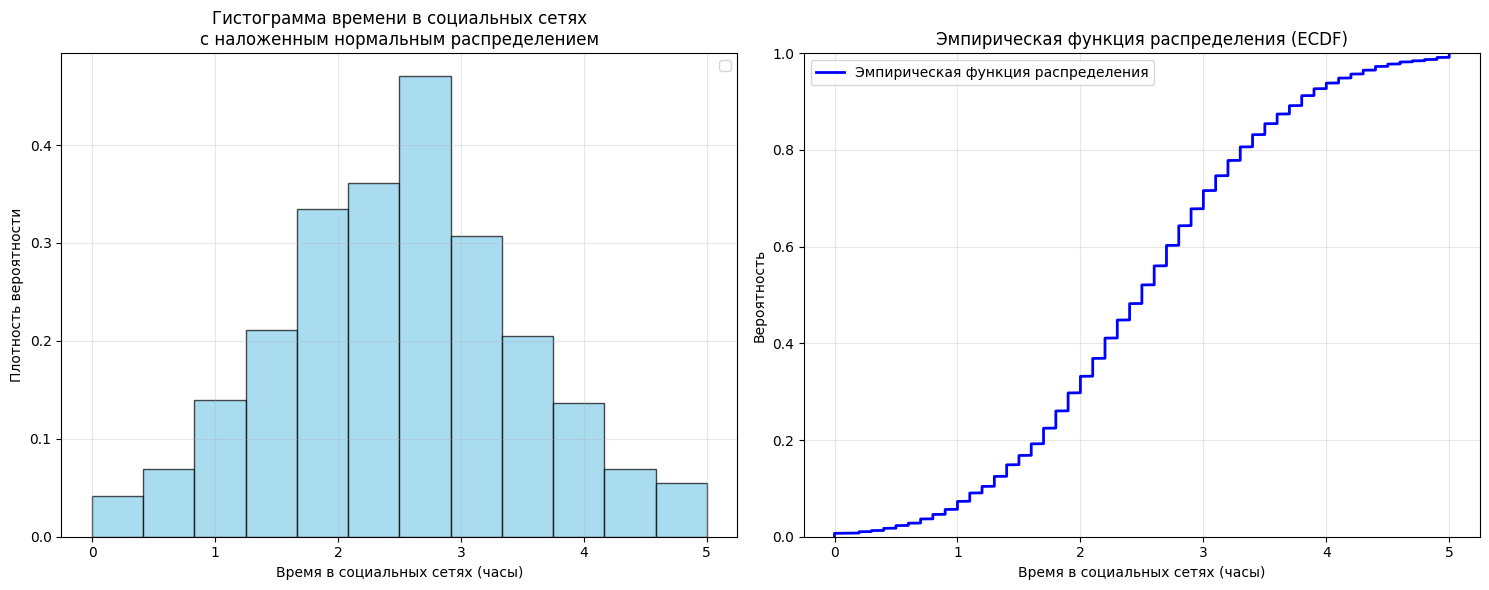

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

bins = int(1 + np.log2(len(data)))

ax1.hist(data, bins=bins, alpha=0.7, color='skyblue', edgecolor='black', density=True)

ax1.set_xlabel('Время в социальных сетях (часы)')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title('Гистограмма времени в социальных сетях\nс наложенным нормальным распределением')
ax1.legend()
ax1.grid(True, alpha=0.3)

x_ecdf = np.sort(data)
y_ecdf = np.arange(1, len(x_ecdf) + 1) / len(x_ecdf)

ax2.plot(x_ecdf, y_ecdf, linewidth=2, color='blue', label='Эмпирическая функция распределения')


ax2.set_xlabel('Время в социальных сетях (часы)')
ax2.set_ylabel('Вероятность')
ax2.set_title('Эмпирическая функция распределения (ECDF)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()



## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

P-value: 0.0000


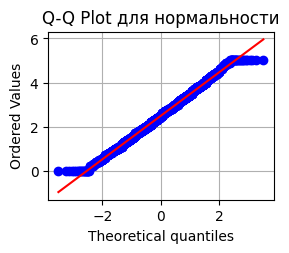

In [49]:
def chi_square_normality_test(data):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    k = int(1 + np.log2(n))

    bin_edges = np.linspace(0, 1, k + 1)
    theoretical_quantiles = stats.norm.ppf(bin_edges, loc=mean, scale=std)
    
    observed, _ = np.histogram(data, bins=theoretical_quantiles)
    
    expected = np.array([n / k] * k)
    
    chi_square = np.sum((observed - expected)**2 / expected)
    
    df = k - 3 
    
    # p-value
    p_value = 1 - stats.chi2.cdf(chi_square, df)
    
    return p_value

print(f"P-value: {chi_square_normality_test(data):.4f}")

plt.subplot(2, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot для нормальности')
plt.grid(True)



## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных


## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы


              count  mean   var   std  min  max
School_Grade                                   
10th            487  2.52  0.92  0.96  0.0  5.0
11th            479  2.49  0.95  0.97  0.0  5.0
12th            529  2.46  1.01  1.01  0.0  5.0
7th             497  2.54  0.92  0.96  0.0  5.0
8th             482  2.47  1.03  1.02  0.0  5.0
9th             526  2.51  1.03  1.01  0.0  5.0


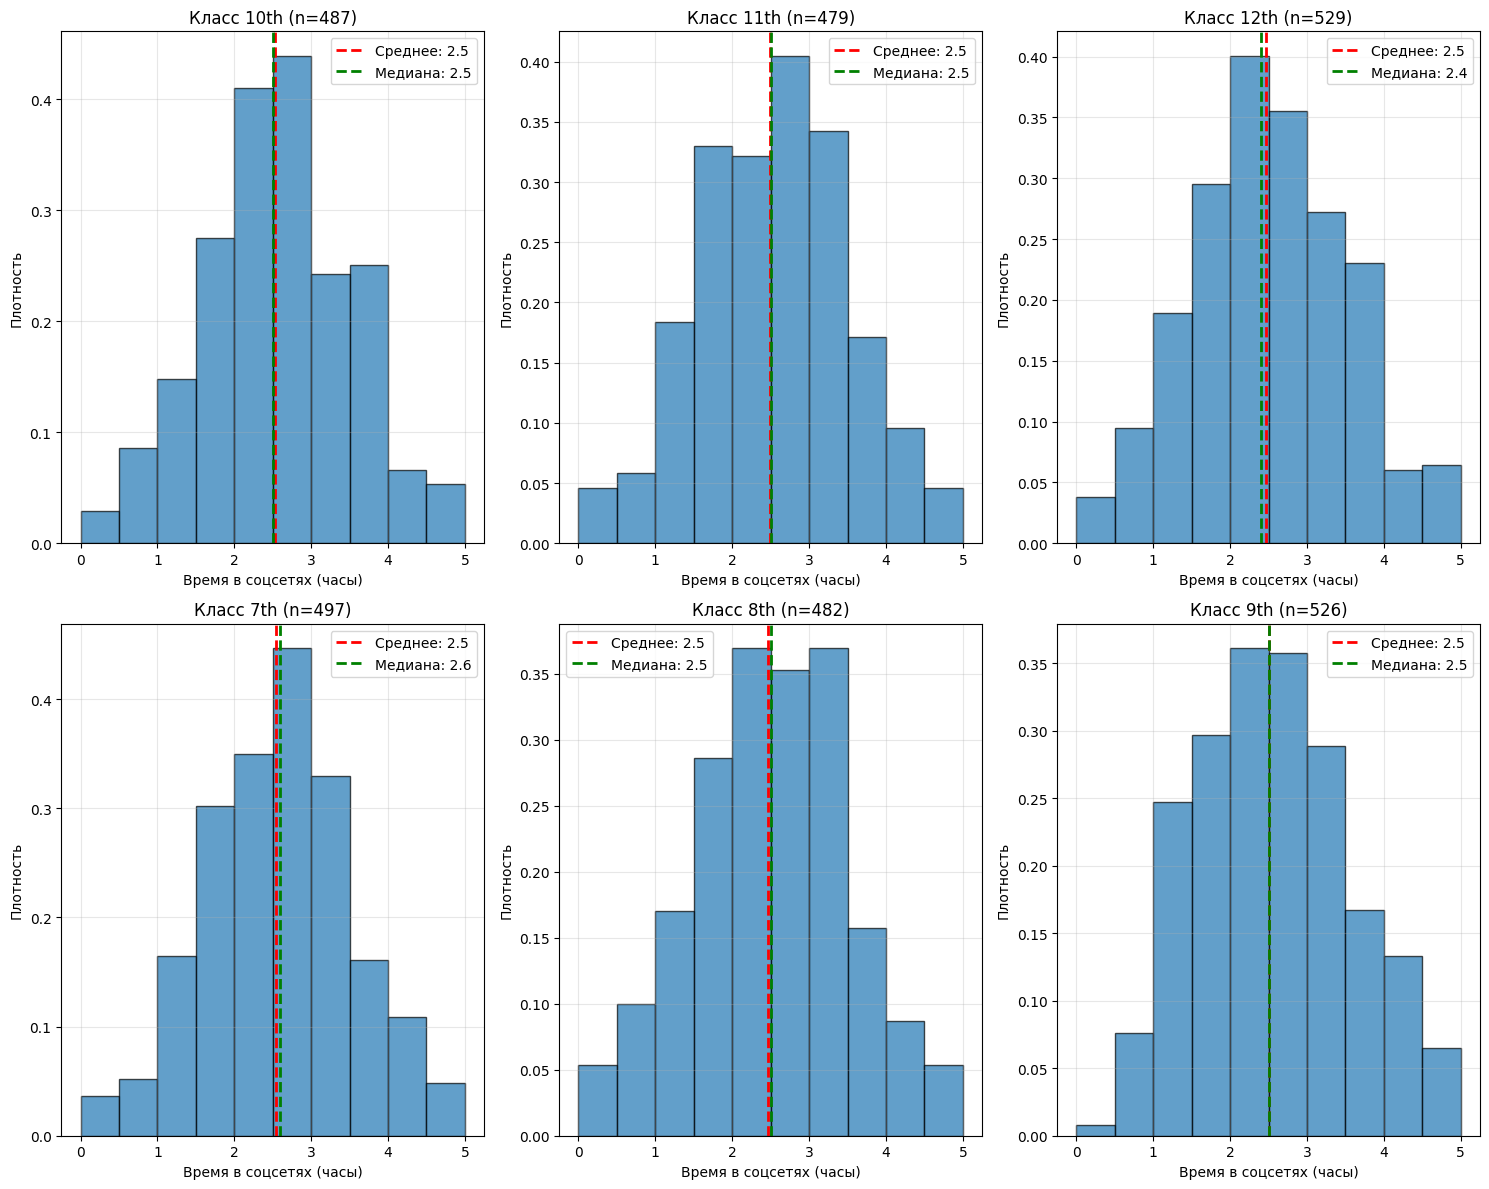

In [50]:
grouped = df.groupby('School_Grade')['Time_on_Social_Media']

stats_by_grade = df.groupby('School_Grade')['Time_on_Social_Media'].agg([
    'count', 'mean', 'var', 'std', 'min', 'max'
]).round(2)

print(stats_by_grade)

# Получаем уникальные классы и сортируем их
grades = sorted(df['School_Grade'].unique())
n_grades = len(grades)

# Создаем subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()
n = len(grade_data)
k = int(1 + np.log2(n))
for i, grade in enumerate(grades):
    grade_data = df[df['School_Grade'] == grade]['Time_on_Social_Media'].dropna()

    ax = axes[i]
    ax.hist(grade_data, bins=k, alpha=0.7, 
            edgecolor='black', density=True)
    ax.axvline(grade_data.mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Среднее: {grade_data.mean():.1f}')
    ax.axvline(grade_data.median(), color='green', linestyle='--', 
                linewidth=2, label=f'Медиана: {grade_data.median():.1f}')
    
    ax.set_title(f'Класс {grade} (n={len(grade_data)})')
    ax.set_xlabel('Время в соцсетях (часы)')
    ax.set_ylabel('Плотность')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'


